# Part 1: **Data Preprocessing and Exploration**:-

Clean the dataset, handle missing values, and convert date columns:

In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/train.csv')

# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Drop rows with missing or invalid dates
df.dropna(subset=['Order Date'], inplace=True)

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Basic summary statistics
print("\nSummary statistics:\n", df.describe())


Missing values:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      4
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

Summary statistics:
             Row ID                     Order Date   Postal Code         Sales
count  3959.000000                           3959   3955.000000   3959.000000
mean   4870.342511  2017-03-14 18:19:11.199798016  55074.172946    220.349362
min       1.000000            2015-01-02 00:00:00   1040.000000      0.556000
25%    2465.500000            2016-04-05 00:00:00  22204.000000     17.472000
50%    4885.000000            2017-05-02 00:00:00  55407.000000     55.360000
75%    7322.500000            2018-03-07 00:00:00  90006.000000    199.980000
max    9800.000000            2018-12-11 00:00:00  99301.000

#PART 2:- ***EXPLORATORY DATA ANALYSIS***

In [5]:
# Total sales by category
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()
print("Total Sales by Category:\n", sales_by_category)

# Create a pivot table for sales by region and category
pivot_table = pd.pivot_table(df, values='Sales', index='Region', columns='Category', aggfunc='sum')
print("\nPivot Table (Sales by Region and Category):\n", pivot_table)


Total Sales by Category:
           Category        Sales
0        Furniture  285562.8726
1  Office Supplies  252956.1610
2       Technology  333844.0900

Pivot Table (Sales by Region and Category):
 Category    Furniture  Office Supplies  Technology
Region                                            
Central    68052.6536        59118.543   81633.873
East       76681.8120        73726.625   95819.194
South      39950.4935        48908.418   57314.878
West      100877.9135        71202.575   99076.145


# ***PART 3: DATA VISUALIZATION***

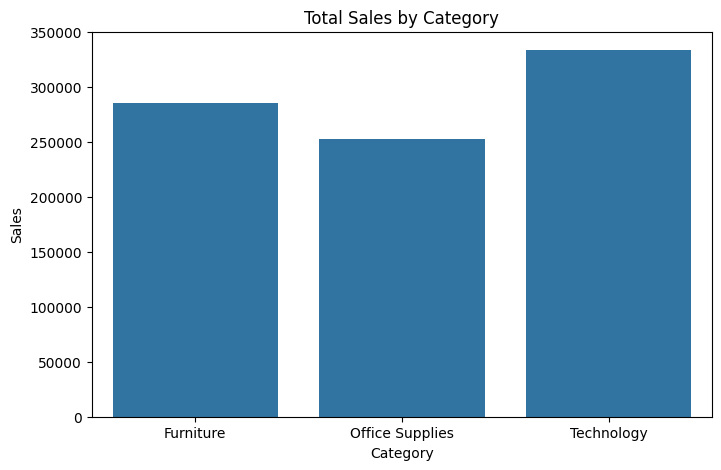

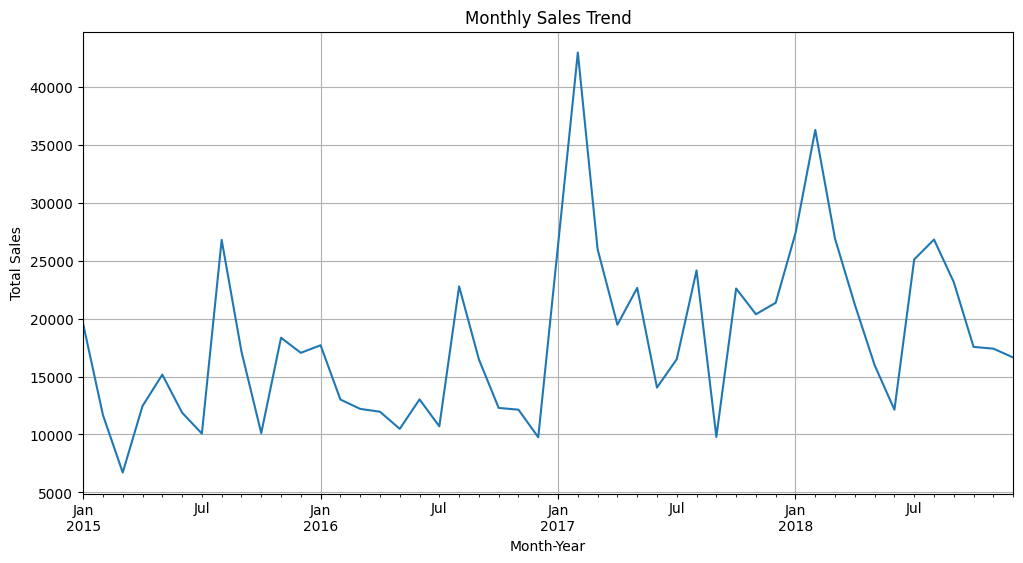

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot total sales by category
plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Sales', data=sales_by_category)
plt.title('Total Sales by Category')
plt.show()

# Monthly sales trend
df['Month-Year'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month-Year')['Sales'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


# PART 3:- **PREDICTIVE ANALYSIS AND FORECASTING**

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuwdmfedq/oqlhk9or.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuwdmfedq/ihssnujo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55522', 'data', 'file=/tmp/tmpuwdmfedq/oqlhk9or.json', 'init=/tmp/tmpuwdmfedq/ihssnujo.json', 'output', 'file=/tmp/tmpuwdmfedq/prophet_modeli_hc5cqk/prophet_model-20241109053742.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:37:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:37:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


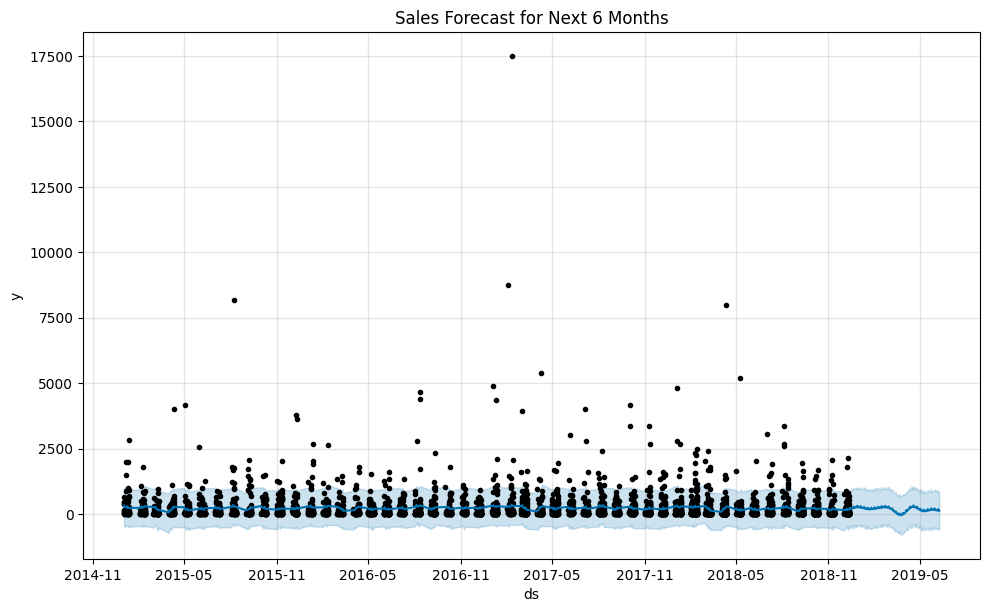

In [7]:
from prophet import Prophet

# Prepare data for Prophet
prophet_df = df[['Order Date', 'Sales']].rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# Initialize and fit the model
model = Prophet()
model.fit(prophet_df)

# Forecast for the next 6 months
future = model.make_future_dataframe(periods=180)
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.title('Sales Forecast for Next 6 Months')
plt.show()


# Part 4: **Machine Learning Model**

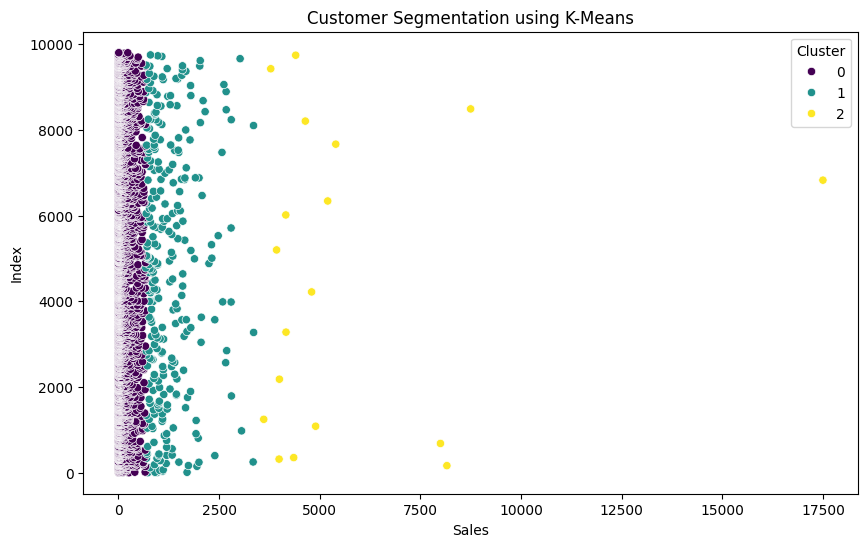

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant features (only 'Sales' since 'Profit' does not exist)
features = df[['Sales']].dropna()

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters (using Sales only)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y=df.index, hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segmentation using K-Means')
plt.xlabel('Sales')
plt.ylabel('Index')
plt.show()



## Part 5:** Business Insights and Recommendations**
Summary statistics by product to identify top products:

In [10]:
# Check if 'Profit' column exists before using it
if 'Profit' in df.columns:
    summary_stats = df.groupby('Product Name').agg({'Sales': 'sum', 'Profit': 'mean'}).reset_index()
    print("\nSummary statistics with profit by product:\n", summary_stats.head())
else:
    summary_stats = df.groupby('Product Name')['Sales'].sum().reset_index()
    print("\nSummary statistics by product:\n", summary_stats.head())



Summary statistics by product:
                                         Product Name   Sales
0  "While you Were Out" Message Book, One Form pe...   8.904
1           #10 Gummed Flap White Envelopes, 100/Box  14.868
2                      #10 Self-Seal White Envelopes  42.142
3            #10- 4 1/8" x 9 1/2" Recycled Envelopes  75.164
4       #10- 4 1/8" x 9 1/2" Security-Tint Envelopes  97.792


Based on the analysis, you can derive actionable insights like:
*   Focus on high-profit categories to drive sales.
*   Increase marketing efforts in regions with lower sales performance.
*   Target specific customer segments for tailored promotions.

